In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


1) Getting(or Reading) CSV file 


In [167]:
df = pd.read_csv('/content/drive/MyDrive/deeplearning/titanic.csv')

2) Taking First look by first 5 rows of our dataset

In [168]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3) Get shape of our Dataset

In [169]:
df.shape

(891, 12)

- It shows our dataset has 891 rows and 12 columns

4) Importnat Information about dataset

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [171]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


-- df.info() code shows datatype of our columns and how many non-null value in columns which useful to take first glance on null values.
-- df.describe() code shows general information like mean,std,min, max,etc.) of int and float datatype of our dataset

5) Counting null values in dataset( we know that null value present in dataset by df.info() )

In [172]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that Age, Cabin  and Embarked columns have  177,687 and 2 null or missing value respectively 

6) Taking percentage of null value from dataset 

In [173]:
print('missing value percentage in Cabin columns: {}'.format((df.Cabin.isnull().sum().mean() / 891)*100))
print('missing value percentage in Age columns: {}'.format((df.Age.isnull().sum().mean() / 891)*100))

missing value percentage in Cabin columns: 77.10437710437711
missing value percentage in Age columns: 19.865319865319865


Now we know nearly 77% value missing or null in Cabin Columns and 19% value missing or null in Age columns 

Here 77% is huge number of Null value so it is better to drop that coloumns

In [174]:
df = df.drop('Cabin', axis=1)

7) Looking at coloumns of our Dataset

In [175]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

8) Droping columns which do not affect our Analysis
here we see that PassangeID, Name and 'Ticket' do not affect much

In [176]:
df = df.drop(['PassengerId','Name','Ticket'], axis=1)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


9) Inspection of data on various variable of our data

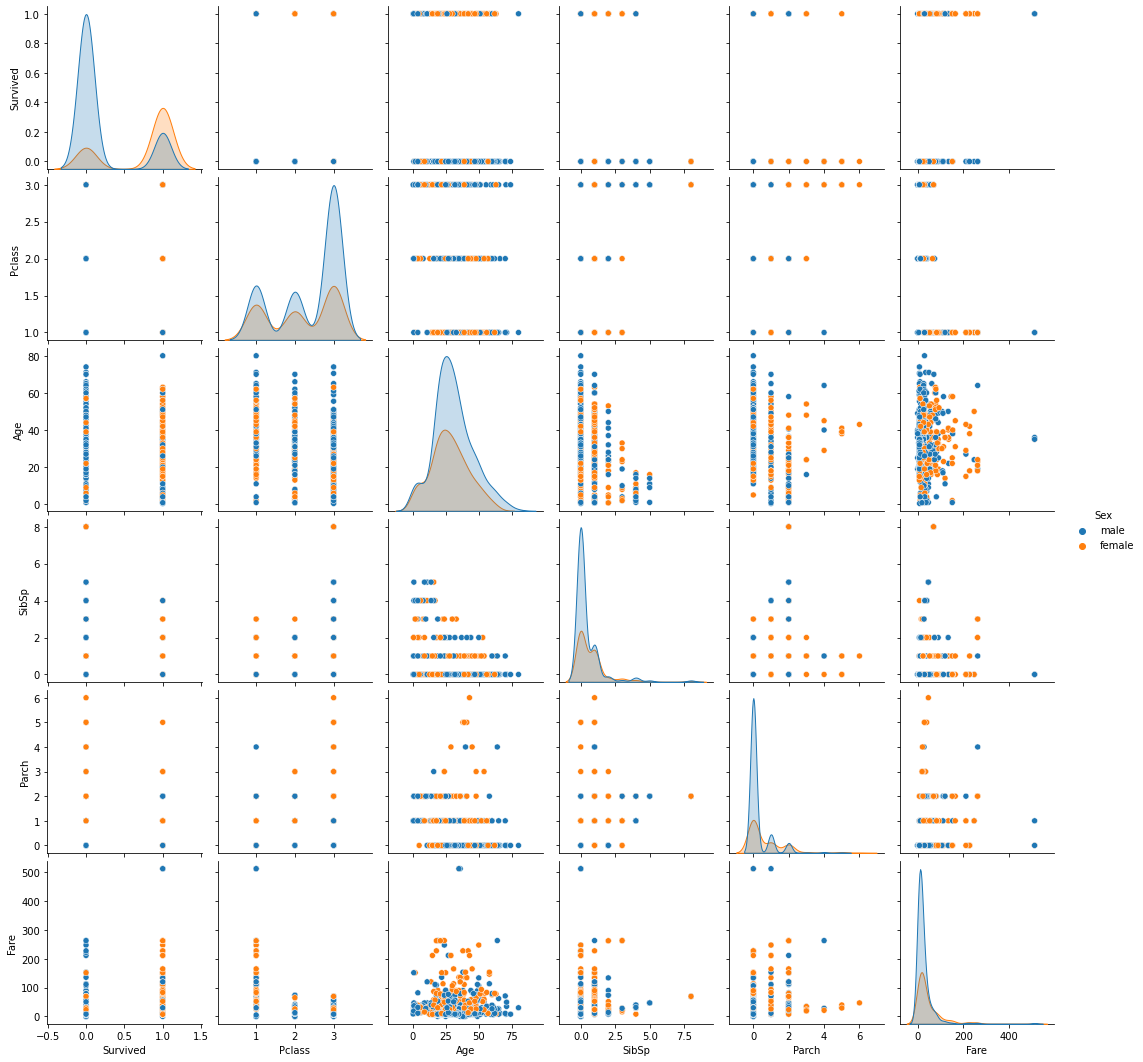

In [177]:
sns.pairplot(df, hue='Sex')

From above plots we can analyse that most of data is normally distributed 

10) Counting category in catogorical Feature

In [178]:
print('categories count in Sex coloum: \n{}'.format(df['Sex'].value_counts()))
print('categories count in Embarked coloum:\n{}'.format(df['Embarked'].value_counts()))

categories count in Sex coloum: 
male      577
female    314
Name: Sex, dtype: int64
categories count in Embarked coloum:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


11) Filling Null value in Age coloum

inspecting KDE plot


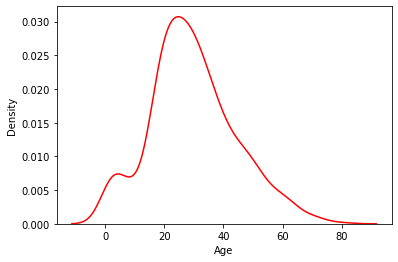

In [179]:
sns.kdeplot(x='Age',data=df,color='red')

Method 1 imputing null value with Median which is good in terms of outliner 
here we can use mean and mode too.

In [180]:
median = df.Age.median()
median


28.0

In [181]:
df['Age_median']= df.Age.fillna(median)

In [182]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_median
0,0,3,male,22.0,1,0,7.2500,S,22.0
1,1,1,female,38.0,1,0,71.2833,C,38.0


In [183]:
df.Age_median.isnull().sum()

0

Now Look if it has impact on our KDE plot

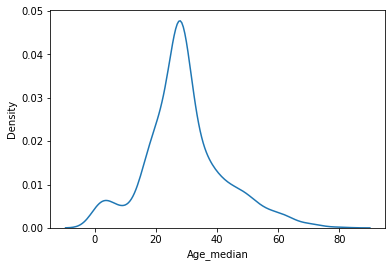

In [184]:
sns.kdeplot(x='Age_median',data=df)

 Method 2  Imputing with Sample
 it will take random value of Age and fill in Null value

In [185]:
random = df.Age.dropna().sample(df.Age.isnull().sum(), random_state=0)

In [193]:
df['Age_random'] = df['Age']
random.index = df[df.Age.isnull()].index
df.loc[df.Age.isnull(),'Age_random'] = random

In [194]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_median,Age_random
0,0,3,male,22.0,1,0,7.2500,S,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,35.0,35.0


In [196]:
df.Age_random.isnull().sum()

0

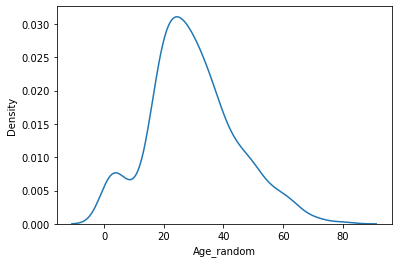

In [197]:
sns.kdeplot(x='Age_random', data=df)

Plot depict same as our kde plot of Age
so for this data set random sampling imputation is good option

droping Age and Age_median coloum

In [198]:
df.drop(['Age','Age_median'], axis=1,inplace=True)

In [199]:
df.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_random
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0


12) Null value imputation in catogorical coloums
**method 1 frequent Catogory imputation**

In [209]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

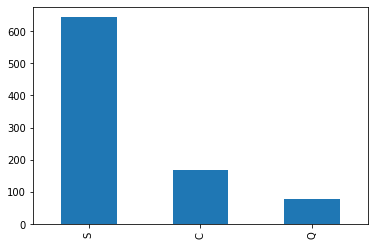

In [212]:
df.Embarked.value_counts().plot.bar()

This shows that S has most frequent in coloums

In [216]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True) #here  we can also use df.Embarked.value_counts().index[0]

In [217]:
df.Embarked.isnull().sum()

0

13) Dummy variable for catogorical feature

In [220]:
df1 = pd.get_dummies(df.Sex, drop_first=True)
df2 = pd.get_dummies(df.Embarked,drop_first=True)

In [221]:
print(df1.head(2))
df2.head(2)

   male
0     1
1     0


,Q,S
0,0,1
1,0,0


14) Merge all dataframe

In [222]:
df = pd.concat([df,df1,df2], axis=1)

In [223]:
df.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_random,male,Q,S
0,0,3,male,1,0,7.2500,S,22.0,1,0,1
1,1,1,female,1,0,71.2833,C,38.0,0,0,0


Drop Sex and Embarked coloums

In [224]:
df.drop(['Sex','Embarked'], axis=1,inplace=True)

In [225]:
df.head(2)

,Survived,Pclass,SibSp,Parch,Fare,Age_random,male,Q,S
0,0,3,1,0,7.2500,22.0,1,0,1
1,1,1,1,0,71.2833,38.0,0,0,0


Checking for null value

In [226]:
df.isnull().sum()

Survived      0
Pclass        0
SibSp         0
Parch         0
Fare          0
Age_random    0
male          0
Q             0
S             0
dtype: int64